In [92]:
import pandas as pd
import regex as re
import numpy as np
from spacy.tokens import Doc
from spacy.attrs import LOWER, POS, ENT_TYPE, IS_ALPHA

In [2]:
inDf = pd.read_csv("/home/blitt/Academic/PSC/NLPPipelines/AG2PIAnalytics/AG2PISlides.csv", sep=",", names = ["Touchpoint", "Pre_Engagement", "Engagement", "Post_Engagement", "Persona"], header=0)
inDf

,Touchpoint,Pre_Engagement,Engagement,Post_Engagement,Persona
0,How do they first discover the existence of AG...,Listserve email about events taking place\nHop...,Boring emails that get buried in lost\nContact...,Talk to co-workers about it\nFeel disappointed...,Scientist Susan
1,How do they stay in contact with AG2PI,Looking for listserves to join\nLooking into r...,Signing up for list serves\nEmail / calling Pi...,Excited to have a contact\nHopeful\nWorried th...,Scientist Susan
2,How do they get information from AG2PI & learn...,"Signing up for listserve, and Twitter\nResearc...",Attending a workshop/meeting\nContributing to ...,Utilize contact information from workshop\nSta...,Scientist Susan
3,How can they share their expertise with AG2PI,"Signing up for listserve, emails\nResearching ...",Responding to or sharing information via email...,"Excited to have contributed, people with share...",Scientist Susan
4,What is defined as a successful interaction,Ease of access to information about interactio...,Knowledge of goals and plans during interactio...,Reflect positively on productiveness\nExcited ...,Scientist Susan
5,How do they first discover the existence of AG...,Shilling/representing for his company at a con...,LinkedIn - read a white paper\nFinds website f...,Asks his boss if he can attend more workshops ...,Industry Ian
6,How do they stay in contact with AG2PI,Looks for a mailing list to join \n\nFrustrate...,Joins a mailing list\n\nInherent conflict betw...,Actually reads the emails and hopefully does n...,Industry Ian
7,How do they get information from AG2PI & learn...,Email lists passively passing through\nThinkin...,Follow on Twitter\nReview calendar on website ...,Planning his time to be available for AG2PI ev...,Industry Ian
8,How can they share information with/to AG2PI,Is it information or selling? \nNicole through...,"Emails Nicole. “Hey I saw this thing, can you ...",Feels great that he just checked something off...,Industry Ian
9,What is defined as a successful interaction,Feeling prepared for workshop and knowing how ...,Participating in sessions that he gets to shar...,Can now take information and actually help cha...,Industry Ian


In [3]:
#we want this data to be in LONG format, so melt columns to rows 
longDf = inDf.melt(id_vars=["Persona", "Touchpoint"], value_vars=["Engagement", "Pre_Engagement", "Post_Engagement"])

In [4]:
longDf.head()

,Persona,Touchpoint,variable,value
0,Scientist Susan,How do they first discover the existence of AG...,Engagement,Boring emails that get buried in lost\nContact...
1,Scientist Susan,How do they stay in contact with AG2PI,Engagement,Signing up for list serves\nEmail / calling Pi...
2,Scientist Susan,How do they get information from AG2PI & learn...,Engagement,Attending a workshop/meeting\nContributing to ...
3,Scientist Susan,How can they share their expertise with AG2PI,Engagement,Responding to or sharing information via email...
4,Scientist Susan,What is defined as a successful interaction,Engagement,Knowledge of goals and plans during interactio...


In [5]:
formattedDf = longDf.set_index(["Persona", "variable", "Touchpoint"]).apply(lambda x: x.str.split("\n").explode()).reset_index()
df = formattedDf

In [6]:
df.head(7)

,Persona,variable,Touchpoint,value
0,Scientist Susan,Engagement,How do they first discover the existence of AG...,Boring emails that get buried in lost
1,Scientist Susan,Engagement,How do they first discover the existence of AG...,Contacting faculty that are involved in their ...
2,Scientist Susan,Engagement,How do they first discover the existence of AG...,Happy to discover that there is a group focusi...
3,Scientist Susan,Engagement,How do they first discover the existence of AG...,"Time conflict, no easily accessible link to mo..."
4,Scientist Susan,Engagement,How do they first discover the existence of AG...,Connections and contacts with other research f...
5,Scientist Susan,Engagement,How do they first discover the existence of AG...,New ideas
6,Scientist Susan,Engagement,How do they first discover the existence of AG...,Website for AG2PI that is loaded with details


In [7]:
#experimenting with some regex stuff...
#this regex will match any of the three punctuation marks followed by any whitespace followed by any of the three 
#punctuation followed by any whitespace and then replace THAT with simply ". " so that we have 
#clean sentance boundaries 
example = "my input. . sentance.. with lots!. of. ? Things! added.."
example = " knowing how to gather details. . ready to learn "
example = "ng to listen or input. . how can we m"
re.sub("(\.|!|\?)\s*(\.|!|\?)\s*", ". ", example)

'ng to listen or input. how can we m'

In [8]:
example = "my input. . sentance.. with lots!. of. ? Things! added.."
re.sub("((\.|!|\?)\s*)", ". ", example).split()

['my',
 'input.',
 '.',
 'sentance.',
 '.',
 'with',
 'lots.',
 '.',
 'of.',
 '.',
 'Things.',
 'added.',
 '.']

In [97]:
#Start some basic text processing using spacy 
import spacy
from spacy.matcher import Matcher
from spacy.util import filter_spans
import re
from collections import Counter
nlp = spacy.load("en_core_web_sm")

#this will return us an nlp document that removes extra spaces and special characters other than punctuation
#we then run the text through the spacy pipeline and return a document object 
#NOTE: we assume that every phrase is a sentance by adding period after 
def cleanAndSep(inDf): 
    allText = ". ".join(inDf["value"])
    
    #remove all characters that aren't punctuation letters or numbers 
    allText = re.sub("[^a-z0-9 \.!\?']", "", allText.lower())
    
    #replace all punctuation that has no words between it with period. Keep one space on right side
    allText = re.sub("(\s*(\.|!|\?)\s*)+", ". ", allText)

    outDoc = nlp(allText)
    
    return outDoc

doc = cleanAndSep(df)
#removing 1 word tokens takes care of punctuation, and they should be gone anyway
tokenList = [token.lemma_ for token in doc if token.text not in nlp.Defaults.stop_words and len(token.text.strip()) > 1]
doc

boring emails that get buried in lost. contacting faculty that are involved in their institution. happy to discover that there is a group focusing on what she is looking for. time conflict no easily accessible link to more information if you cant make the meeting. connections and contacts with other research faculty. new ideas. website for ag2pi that is loaded with details. signing up for list serves. email  calling pis or admin support people. setting up the actual interaction is an interaction in itself  and can be positive or negative based on how easy it is to achieve. attending workshopsevents. making phone calls. reading emails  need to keep them engaging or at this point susan will let emails float down to junk status. feel like a part of the team when reading from listserve. learning about the others in the group. attending a workshopmeeting. contributing to researchdiscussiondialogue. talking with leadershipother attendees. reaching out for more information. talking with other

In [10]:
#here we want to remove stop words, spaces, punctuation, etc and keep only the important words for analysis 
#input should be a list of spacy tokens 
def getImportantWords(inList): 
    return [item for item in inList if item.is_stop == False and len(str(item).strip()) > 0 and item.pos_ != "PUNCT"]
leanDoc = getImportantWords(doc)
leanDoc

[boring,
 emails,
 buried,
 lost,
 contacting,
 faculty,
 involved,
 institution,
 happy,
 discover,
 group,
 focusing,
 looking,
 time,
 conflict,
 easily,
 accessible,
 link,
 information,
 nt,
 meeting,
 connections,
 contacts,
 research,
 faculty,
 new,
 ideas,
 website,
 ag2pi,
 loaded,
 details,
 signing,
 list,
 serves,
 email,
 calling,
 pis,
 admin,
 support,
 people,
 setting,
 actual,
 interaction,
 interaction,
 positive,
 negative,
 based,
 easy,
 achieve,
 attending,
 workshopsevents,
 making,
 phone,
 calls,
 reading,
 emails,
 need,
 engaging,
 point,
 susan,
 let,
 emails,
 float,
 junk,
 status,
 feel,
 like,
 team,
 reading,
 listserve,
 learning,
 group,
 attending,
 workshopmeeting,
 contributing,
 researchdiscussiondialogue,
 talking,
 leadershipother,
 attendees,
 reaching,
 information,
 talking,
 involved,
 colleagues,
 receiving,
 updates,
 email,
 listserve,
 signing,
 future,
 updatesinformation,
 set,
 aside,
 email,
 reading,
 time,
 day,
 review,
 emails,

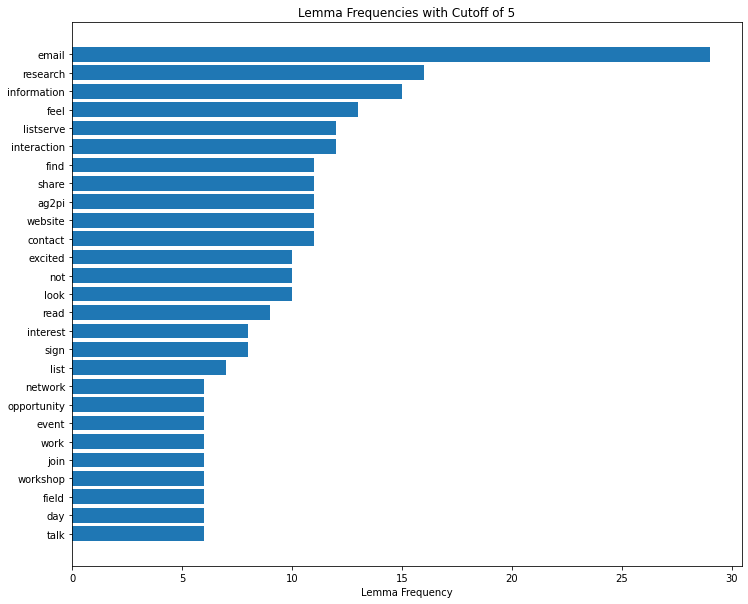

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 10]

def countLemmaFreqs(inTokens, freqCut): 
    countDict = Counter([token for token in inTokens])
    
    tokenList.sort(key = lambda x: countDict[x], reverse = False)
    tokenDisplay = [token for token in tokenList if countDict[token] > freqCut]
    tokenFreqs = [countDict[term] for term in tokenDisplay]
    return list(set(tokenDisplay))
    
#takes in a list of tokens (because we may want to use lemmas or original tokens etc..) 
#gets freqs from this list and then displays all words over the given cutoff frequency 
def plotFreqChart(inTokens, freqCut): 
    #plt.hist([token.text for token in tokenList if countDict[token.text] > FREQ_CUT ])


    #plt.xticks(rotation=45)
    #plt.show()
    countDict = Counter([token for token in inTokens])
    
    tokenList.sort(key = lambda x: countDict[x], reverse = False)
    tokenDisplay = [token for token in tokenList if countDict[token] > freqCut]
    tokenFreqs = [countDict[term] for term in tokenDisplay]
    plt.barh(tokenDisplay, tokenFreqs)
    plt.xlabel("Lemma Frequency")
    plt.title("Lemma Frequencies with Cutoff of " + str(freqCut))
    
plotFreqChart(tokenList, 5)


In [12]:
def countRowColLemmaFreqs(inDf, rcName, freqCutoff, itemName): 
    #get lemmas for just the one column name in original google slide 
    rcDf = inDf[inDf[itemName] == rcName]
    rcTokens = cleanAndSep(rcDf)
    rcLemmas = tokenList = [token.lemma_ for token in rcTokens if token.text not in nlp.Defaults.stop_words and len(token.text.strip()) > 1]
    
    return countLemmaFreqs(rcLemmas, freqCutoff)


#this function will create a frequency count diagram for a specific column or row 
#on the ORIGINAL google slide (not a column/row in inDf) across all personas 
#in the AG2PI example, a "row" is a given touchpoint prompt. itemName is the variable name in 
#df that we need to split by, i.e. "variable" or "touchpoint"
def plotRowColLemmas(inDf, rcName, freqCutoff, itemName): 
    #clear out last plot
    plt.clf()
    #get lemmas for just the one column name in original google slide 
    rcDf = inDf[inDf[itemName] == rcName]
    rcTokens = cleanAndSep(rcDf)
    rcLemmas = tokenList = [token.lemma_ for token in rcTokens if token.text not in nlp.Defaults.stop_words and len(token.text.strip()) > 1]
    
    #plot freqs of the lemmas 
    plotFreqChart(rcLemmas, freqCutoff)

#COMMENT: plotRowColLemmas(df, "Pre_Engagement", 3, "variable")

In [13]:
#COMMENT: plotRowColLemmas(df, "Engagement", 3, "variable")

In [14]:
#COMMENT: plotRowColLemmas(df, "Post_Engagement", 3,"variable")

In [15]:
#need to get the unique touchpoints 
#countColLemmas(df, "Pre_Engagement", 3)
touchpointList = list(df["Touchpoint"].unique())
df.columns

Index(['Persona', 'variable', 'Touchpoint', 'value'], dtype='object')

In [16]:
print(touchpointList[0])
#COMMENT: plotRowColLemmas(df, touchpointList[0], 2, "Touchpoint")

How do they first discover the existence of AG2PI & what are they looking for?


In [17]:
# to try and glean more knowledge we can actually get into sentance structure and try to leverage that 
# we can simply iterate over the "noun chunks" i.e. base noun phrases to look at how nouns are described

#trying to work with noun chunks and getting verbs pointing to nouns 
"""
COMMENT: Exploratory code
for chunk in doc.noun_chunks: 
    #print(chunk.text, chunk.root.text, chunk.root.dep_,chunk.root.head.text)
    #print(chunk.text)
    
    #the root is the noun being referred to 
    print(chunk.root.text)
    
    #we can get the depedancies of root as follows 
    verbsAdjectives = [child for child in chunk.root.children if child.pos_ == "VERB"]
    print(verbsAdjectives)
    print()
    
    """

'\nCOMMENT: Exploratory code\nfor chunk in doc.noun_chunks: \n    #print(chunk.text, chunk.root.text, chunk.root.dep_,chunk.root.head.text)\n    #print(chunk.text)\n    \n    #the root is the noun being referred to \n    print(chunk.root.text)\n    \n    #we can get the depedancies of root as follows \n    verbsAdjectives = [child for child in chunk.root.children if child.pos_ == "VERB"]\n    print(verbsAdjectives)\n    print()\n    \n    '

In [18]:
#here is an example of finding nouns that are subjects of verbs and gettin the verbs they are a subject of 
for token in doc: 
    if token.dep_ == "nsubj" and token.head.pos_ == "VERB":
        pass
        #print(token.text + " " + token.head.text)

In [72]:
#try and get the subjects or verbs corresponding to a list of tokens 
#NOTE: this is inefficient and would need to be optimized if we have very long document 
def getPairing(inList): 
    for inToken in inList: 
        for docToken in doc: 
            if inToken == docToken.lemma_ or inToken == docToken.head.lemma_: 
                #print(token.head.text)
                #print(token)
    #             print(token.head.pos_)
    #             print(token.dep_)
    #             print()
                if docToken.dep_ == "nsubj": 
                    pass
                    #print(token.text + " " + token.head.text)

                if docToken.head.lemma_ in inList: 
                    #interestingDeps = ["amod", "acl", "compound", "nsubj", "dative", "advmod", "nsubjpass", "dobj"]
                    #if docToken.dep_ in interestingDeps: 
                    
                    print(docToken)
                    print(docToken.head)
                    print(print([obj.text for obj in docToken.head.lefts]))
                    print(print([obj.text for obj in docToken.head.rights]))
                    print("")
                    #if docToken.head.text in [obj.text for obj in docToken.lefts]: 
                        
                    #    print(docToken.text + " " + docToken.head.text + " " + docToken.dep_)
    #             if token.dep_ == "nobj": 
    #                 print(token.text + token.dep_)


                #if token.dep_ == "nsubj" and token.head.pos_ == "VERB":
                #    print(token.text + " " + token.head.text)

#get a list of lists that gives all of the noun phrases corresponding to each one of the tokens in inList
#returns lemmatized, stop-words-removed version of noun phrase 
outDict = {}
def getNounPhrases(inList, lenMin, lenMax, **kwargs): 
    #words passed that we don't want to include in our noun phrases 
    if "avoidList" in kwargs:
        toAvoid = kwargs["avoidList"]
        print(toAvoid)
    else: 
        toAvoid = []
    
    outList = []
    for noun in inList: 
        thisNoun = []
        for chunk in doc.noun_chunks: 
            lemmaChunk = [item.lemma_ for item in getImportantWords(list(chunk))]
            #print(lemmaChunk)
            if noun in lemmaChunk and len(lemmaChunk) >= lenMin and len(lemmaChunk) <= lenMax: 
                #make sure no words are in avoid list 
                shouldAvoid = False
                for item in toAvoid: 
                    if item in lemmaChunk: 
                        print(lemmaChunk)
                        shouldAvoid = True
                        
                if shouldAvoid == False: 
                    thisNoun.append(" ".join(lemmaChunk))
                
        outList.append(thisNoun)
    return outList

#directly from answer at: https://stackoverflow.com/questions/47856247/extract-verb-phrases-using-spacy
def getAllVerbPhrases(inDoc): 
    #match 
    pattern=[[{'POS': 'VERB', 'OP': '?'},{'POS': 'ADV', 'OP': '*'},{'OP': '?',"IS_PUNCT": False}, {'OP': '?', "IS_PUNCT": False}, {'OP': '?', "IS_PUNCT": False},{'POS': 'VERB', 'OP': '+'}],
            [{'POS': 'VERB', 'OP': '+'},{'OP': '?',"IS_PUNCT": False}, {'OP': '?', "IS_PUNCT": False}, {'OP': '?', "IS_PUNCT": False},{'POS': 'ADV', 'OP': '*'}]]
    
    #print(pattern)

    # instantiate a Matcher instance
    matcher = Matcher(nlp.vocab) 

    # Add pattern to matcher
    matcher.add("verb-phrases", pattern)

    # call the matcher to find matches 
    matches = matcher(inDoc) 
    #print(len(matches))
    spans = [doc[start:end] for _, start, end in matches] 
    return filter_spans(spans)

def getVerbPhrases(inList, inDoc, lenMin, lenMax):
    verbPhrases = list(getAllVerbPhrases(inDoc))
    outList = []
    for verb in inList:
        #print(verb.upper())
        thisVerb = []
        for i in range(len(verbPhrases)): 
            lemmaChunk = [item.lemma_ for item in verbPhrases[i] if item.is_stop == False]
            origPhrase = verbPhrases[i].text
            if verb in lemmaChunk and len(origPhrase.split()) >= lenMin and len(origPhrase.split()) <= lenMax: 
                #print(verb + " is in " + str(verbPhrases[i].text))
                thisVerb.append(origPhrase)
                #thisVerb.append(" ".join(lemmaChunk))
        outList.append(list(set(thisVerb)))
    return outList
    
#getPairing(["send", "provide", "find"])
#print(getNounPhrases(["send", "provide", "find", "paper"], 2, 3))
#getVerbPhrases(["send", "provide", "find"], 3)

In [78]:
#getVerbPhrases(["email", "research", "feel", "find", "share"],doc, 2, 3)
print(getNounPhrases(["email", "research"], 2, 3))

[['boring email', 'read email', 'email nicole', 'boring email', 'read email', 'listserve email newsletter', 'listserve email', 'listserve email', 'ag email'], ['research faculty', 'research technical jargon', 'research topic', 'research agenda', 'research network', 'lab research group', 'research interest', 'research result', 'research partner publication']]


In [21]:
overThreeLemmas = countRowColLemmaFreqs(df, "Pre_Engagement", 3, "variable")
print(overThreeLemmas)
nPhrases = getNounPhrases(overThreeLemmas, 1, 4)
print(nPhrases)

['research', 'look', 'email', 'find', 'sign', 'know', 'listserve', 'information']
[['research faculty', 'research', 'research technical jargon', 'research', 'research topic', 'research agenda', 'research network', 'lab research group', 'research interest', 'research result', 'research', 'research partner publication'], [], ['boring email', 'read email', 'email', 'email', 'email', 'email', 'email', 'email', 'email', 'email nicole', 'boring email', 'read email', 'listserve email newsletter', 'listserve email', 'email', 'email', 'listserve email', 'ag email', 'email', 'email', 'email', 'email', 'email', 'email', 'email'], [], [], [], ['listserve', 'listserve email newsletter', 'listserve email', 'listserve', 'listserve', 'listserve', 'listserve email'], ['information', 'information', 'information', 'fabulous information', 'website information current event', 'information', 'contact information', 'contact information', 'information', 'information', 'information', 'information', 'contact in

In [22]:
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def getLemmasCutoff(inDoc, freqCut): 
    countDict = Counter([token.lemma_ for token in inDoc])
    cleanTokens = [token for token in set([item for item in inDoc]) if countDict[token.lemma_] > freqCut]
    
    tokenSet = []
    for item in inDoc: 
        if countDict[item.lemma_] > freqCut and item.lemma_ not in tokenSet: 
            tokenSet.append(item.lemma_)
    
    tokenFreqs = [countDict[term] for term in tokenSet]
    
    #dictionary with frequency for all lemmas, set of lemmas returned, and the frequency of lemmas returned 
    return countDict, tokenSet, tokenFreqs

    
#tokenList is generated by simply keeping tokens over a given threshold of frequency 
cleanTokens = [token for token in doc if token.is_stop == False and token.pos_ != "PUNCT" and len(str(token).strip()) > 0]
countD, lemmas, lemmaCounts = getLemmasCutoff(cleanTokens, 3)
print(countD)
print(lemmas)
print(lemmaCounts)


Counter({'email': 29, 'research': 16, 'information': 15, 'feel': 13, 'interaction': 12, 'listserve': 12, 'contact': 11, 'website': 11, 'ag2pi': 11, 'share': 11, 'find': 11, 'look': 10, 'not': 10, 'excited': 10, 'read': 9, 'sign': 8, 'interest': 8, 'list': 7, 'talk': 6, 'day': 6, 'field': 6, 'workshop': 6, 'join': 6, 'work': 6, 'event': 6, 'opportunity': 6, 'network': 6, 'group': 5, 'idea': 5, 'people': 5, 'attend': 5, 'phone': 5, 'like': 5, 'great': 5, 'thing': 5, 'presentation': 5, 'ask': 5, 'know': 5, 'time': 4, 'new': 4, 'detail': 4, 'call': 4, 'set': 4, 'positive': 4, 'need': 4, 'reach': 4, 'colleague': 4, 'future': 4, 'industry': 4, 'follow': 4, 'hear': 4, 'farmer': 4, 'datum': 4, 'researcher': 4, 'access': 4, 'send': 4, '.': 4, 'boring': 3, 'involve': 3, 'focus': 3, 'support': 3, 'negative': 3, 'engage': 3, 'contribute': 3, 'knowledge': 3, 'plan': 3, 'clear': 3, 'communication': 3, 'white': 3, 'paper': 3, 'mailing': 3, 'ip': 3, 'twitter': 3, 'participate': 3, 'get': 3, 'operation

(0.9677975592919913, 0.44127456009157356, 0.5358103155058701)


[150, 68, 83]

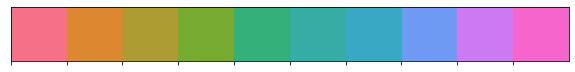

In [23]:
#palette = sns.husl_palette(8)
sns.palplot(sns.husl_palette(10))
print(sns.husl_palette(10)[0])

[int(item * 155) for item in (0.9677975592919913, 0.44127456009157356, 0.5358103155058701)]

In [24]:
# Apply our color function
import random 
import seaborn as sns
import matplotlib.pyplot as plt

"""
OLD CODE. NEW VERSION IN CELL BELOW

#palette = sns.color_palette("hls", 8)
#colorDict = 

tokens = [["yes", "no"], ["maybe", "so"], ["never"]]

def getPalette(wordGroups): 
    
    palette = sns.husl_palette(len(wordGroups))
    rgbPal = []
    for item in palette: 
        newTup = tuple(int(item*255) for item in item)
        rgbPal.append(newTup)
        
    outDict = {}
    for i in range(len(wordGroups)): 
        group = wordGroups[i]
        for word in group: 
            outDict[str(word).strip()] = rgbPal[i]
    print(outDict)
    return outDict

#print(getPalette(["yes", "no", "maybe", "so"]))

myPalette = getPalette(nPhrases)

def grouped_color_func(word, **kwargs): 
    #get the colors for the right amount
    return myPalette[word]


wc.recolor(color_func=grouped_color_func)

plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show(
"""

'\nOLD CODE. NEW VERSION IN CELL BELOW\n\n#palette = sns.color_palette("hls", 8)\n#colorDict = \n\ntokens = [["yes", "no"], ["maybe", "so"], ["never"]]\n\ndef getPalette(wordGroups): \n    \n    palette = sns.husl_palette(len(wordGroups))\n    rgbPal = []\n    for item in palette: \n        newTup = tuple(int(item*255) for item in item)\n        rgbPal.append(newTup)\n        \n    outDict = {}\n    for i in range(len(wordGroups)): \n        group = wordGroups[i]\n        for word in group: \n            outDict[str(word).strip()] = rgbPal[i]\n    print(outDict)\n    return outDict\n\n#print(getPalette(["yes", "no", "maybe", "so"]))\n\nmyPalette = getPalette(nPhrases)\n\ndef grouped_color_func(word, **kwargs): \n    #get the colors for the right amount\n    return myPalette[word]\n\n\nwc.recolor(color_func=grouped_color_func)\n\nplt.figure()\nplt.imshow(wc, interpolation="bilinear")\nplt.axis("off")\nplt.show(\n'

In [94]:
def getPalette(wordGroups, **kwargs): 
    joinWith = "_"
    if "joinWith" in kwargs: 
        joinWith = kwargs["joinWith"]
    palette = sns.husl_palette(len(wordGroups))
    rgbPal = []
    for item in palette: 
        newTup = tuple(int(item*255) for item in item)
        rgbPal.append(newTup)
        
    outDict = {}
    for i in range(len(wordGroups)): 
        group = wordGroups[i]
        for word in group: 
            outDict[joinWith.join(str(word).split())] = rgbPal[i]

    return outDict

"""
def grouped_color_func(word,**kwargs): 
    #get the colors for the right amount
    return inPalette[word]
"""

#key-word arguments:
#avoidList: a list of words that shouldn't be in wordcloud (won't include entire noun phrase)
#joinWith: the character we want to use to join the words in noun phrases together. Default is underscore
def wCloudCategories(inTokens, freqCut, **kwargs):
    
    #we can add an avoidList to remove certain words 
    if "avoidList" in kwargs: 
        toAvoid = kwargs["avoidList"]
    else: 
        toAvoid = []
        
    #what item should we be joining our words with 
    #dash by default 
    if "joinWith" in kwargs:
        joinWith = kwargs["joinWith"]
    else: 
        joinWith = "_"
    
    freqDict, targetTokens, tokenFreqs = getLemmasCutoff(inTokens, freqCut)
    
    print(targetTokens)
    #get noun phrases for each of the high frequency lemmas in targetTokens 
    nPhrases = getNounPhrases(targetTokens, 2, 4, avoidList = toAvoid)
    
    #we need to send an actual document so we can get spans... hence creating doc 
    np_array = np.array([[token.lower, token.pos, token.ent_type, token.is_alpha] for token in inTokens])
    doc2 = Doc(nlp.vocab, words=[token.text for token in inTokens])
    doc2.from_array([LOWER, POS, ENT_TYPE, IS_ALPHA], np_array)
    
    
    vPhrases = getVerbPhrases(targetTokens, doc2, 2, 4)
    
    #flatten the noun phrases into a list that WordCloud can understand 
    #flatNPhrases = [joinWith.join(str(item).split()) for sublist in nPhrases for item in sublist]
    
    #we use the frequency of the original lemma (not the phrase) to determine size here 
    lemmaPhraseDict = {}
    for i in range(len(nPhrases)): 
        currPhraseList = nPhrases[i]
        currWord = targetTokens[i]
        for phrase in currPhraseList: 
            concatPhrase = joinWith.join(str(phrase).split())
            lemmaPhraseDict[concatPhrase] = freqDict[currWord]
            
    print(lemmaPhraseDict) 
            
    
    #generate the wordcloud, change the dictionary to have the frequencies of the original lemmas 
    #instead of the phrases themselves 
    plt.figure()
    plt.figure(figsize=(12, 12))
    
    """
    phraseFreqs = {}
    for phrase in flatNPhrases: 
        phraseList = phrase.split(joinWith)
        
        for token in phraseList:
    """      
            
    wc = WordCloud(background_color="#f0f2f5", height=500, width=800).generate_from_frequencies(lemmaPhraseDict)
    
    #get a color palette to use for the different groups in nPhrases
    myPalette = getPalette(nPhrases)
    
    wc.recolor(color_func=lambda word, **kwargs: myPalette[word])

    
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    #plt.show()
    wc.to_file("/home/blitt/Academic/PSC/NLPPipelines/AG2PIAnalytics/superCloudMockUp.png")
    #plt.savefig("/home/blitt/Academic/PSC/NLPPipelines/AG2PIAnalytics/superCloudMockUp.png")
    
wCloudCategories(getImportantWords(doc), 10, avoidList = ["boring"])


['email', 'contact', 'information', 'research', 'website', 'ag2pi', 'interaction', 'feel', 'listserve', 'share', 'find']
['boring']
['boring', 'email']
['boring', 'email']


<ipython-input-94-b62ee128db3b>:52: UserWarning: [W028] Doc.from_array was called with a vector of type 'float64', but is expecting one of type uint64 instead. This may result in problems with the vocab further on in the pipeline.
  doc2.from_array([LOWER, POS, ENT_TYPE, IS_ALPHA], np_array)


ValueError: [E155] The pipeline needs to include a morphologizer or tagger+attribute_ruler in order to use Matcher or PhraseMatcher with the attribute POS. Try using `nlp()` instead of `nlp.make_doc()` or `list(nlp.pipe())` instead of `list(nlp.tokenizer.pipe())`.

['contact', 'website', 'ag2pi', 'share', 'find', 'interaction', 'listserve', 'feel', 'information', 'research', 'email']


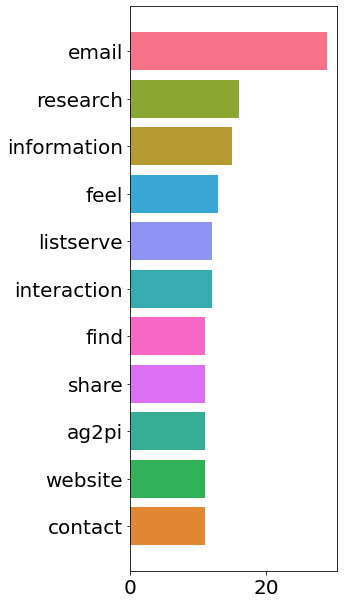

In [57]:
def coloredFreqGraph(inTokens, freqCut):
    freqDict, targetTokens, targetFreqs = getLemmasCutoff(inTokens, freqCut)

    palette = sns.husl_palette(len(targetTokens))
    rgbDict = {}
    for i in range(len(targetTokens)):
        currToken = targetTokens[i]
        currTup = palette[i]
        #newTup = tuple(int(item*255) for item in currTup)
        rgbDict[currToken] = currTup
    
    targetTokens.sort(key = lambda x: freqDict[x], reverse = False)
    print(targetTokens)
    plt.barh(targetTokens, [freqDict[token] for token in targetTokens], color=[rgbDict[token] for token in targetTokens])
    plt.rcParams["figure.figsize"] = (4.5,8.5)
    plt.rcParams['xtick.labelsize']= 20
    plt.rcParams['ytick.labelsize']= 20
    plt.tight_layout()
    plt.savefig("/home/blitt/Academic/PSC/NLPPipelines/AG2PIAnalytics/coloredFreqMockUp.png")
    
coloredFreqGraph(getImportantWords(doc), 10)
